In [242]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [243]:
train_data_set = np.load("fashion_train.npy")


# We have 10000 images in the training set
len(train_data_set)

# To find classification for each element, the last value in the set is:
# 0 for T-shirt/top
# 1 for Trousers
# 2 for Pullover
# 3 for Dress
# 4 for Shirt
len(train_data_set[0])

785

In [244]:
# We need to clean the array, as the last value is the classification. Let's first save these separately.

train_element = []

for i in range(len(train_data_set)):
    train_element.append(train_data_set[i][784])
      
train_element = np.array(train_element)

In [245]:
# Now we can delete the last element and have a cleaned training set that we can work with.

cleaned_train_set = np.empty((len(train_data_set), 784), dtype=np.uint8)

for i in range(len(train_data_set)):
    temp = np.delete(train_data_set[i], 784)
    cleaned_train_set[i] = temp

In [246]:
len(cleaned_train_set[0])

784

In [247]:
cleaned_train_set[55]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127, 153, 155,
       121, 109, 135, 149, 165,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  77, 141,
         0,  19,  43,  61,  46, 141, 189,   8,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   0,  48, 161,  99, 130, 154,
       176, 230, 169,  90,  89, 117, 168, 225, 150, 148, 168, 155, 176,
        97,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  90, 182,
       161, 128,  80,  20,  46, 127, 173, 189, 146,  32,   8,  39,  52,
        83,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25,  74,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  76, 161,  28,   0,   0,   0,   0,   0,   0,
       159, 248, 192,  88, 105, 177, 236, 208, 216, 203, 186, 234, 238,
       243, 187, 181, 208, 146, 174, 220, 224, 110,   0,   0,   0,   0,
         0,   0, 109, 149, 202, 233, 226, 202, 176, 161, 130, 13

In [248]:
for i in cleaned_train_set:
    for j in range(784):
        if i[j] < 14:
            i[j] = 0

In [249]:
# We reshape it so that the 1D array becomes a 2D 28x28 array.

cleaned_train_set_reshaped = cleaned_train_set.reshape(-1, 28, 28)

In [204]:
def show_image(index_num):
    '''
    Simple function for showing the image and printing the category.
    
    index_num: The index you would like to show.
    '''
    img = cleaned_train_set_reshaped[index_num]
    #img2 = np.invert(img)
    plt.imshow(np.invert(img), cmap ='gray', vmin = 0, vmax = 255)
    plt.show()

    cloth_cat = train_element[index_num]
    if cloth_cat == 0:
        print("0: This is a t-shirt/top")
    if cloth_cat == 1:
        print("1: This is a pair of trousers")
    if cloth_cat == 2:
        print("2: This is a pullover")
    if cloth_cat == 3:
        print("3: This is a dress")
    if cloth_cat == 4:
        print("4: This is a shirt")
        
def count_categories(categories):
    '''
    Another stupidly simple function for counting the categories.
    
    categories: The numpy array of all categories, corresponding to index number.
    '''
    
    ze_val = 0
    on_val = 0
    tw_val = 0
    th_val = 0
    fo_val = 0
    for i in categories:
        if i == 0:
            ze_val += 1
        if i == 1:
            on_val += 1
        if i == 2:
            tw_val += 1
        if i == 3:
            th_val += 1
        if i == 4:
            fo_val += 1
    
    print(f'There are {ze_val} t-shirts/tops. There are {on_val} pairs of trousers. There are {tw_val} pullovers. There are {th_val} dresses. There are {fo_val} shirts.')
    

In [226]:
cleaned_train_set_reshaped[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 111,  81,
         22,   0,  50, 183,  92,  33,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67, 143, 178, 189, 167, 184,
        221, 225, 255, 170, 152, 165, 161, 132,  65,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  62, 144, 158, 150, 143, 134, 136, 118,
        113, 109,  97, 106, 115, 113, 122, 126, 132, 153,  28,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  35, 147, 144, 132, 134, 135, 127, 130, 136,
        165, 169, 167, 110, 102, 110, 109, 107, 104, 109, 106,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 136, 127, 134, 128, 135, 123, 141, 170,
        135, 144, 149, 148, 127, 106, 111, 107,  96,  93, 132,  24,   0,
          0,   0],
       [  0,   0,   0,   0, 149, 140, 126, 122, 124, 123, 130, 126, 107,
        117, 105,  93,  96, 100, 106, 102,  94,  84,  98, 100,  67,   0,
          0,   0],
       [  

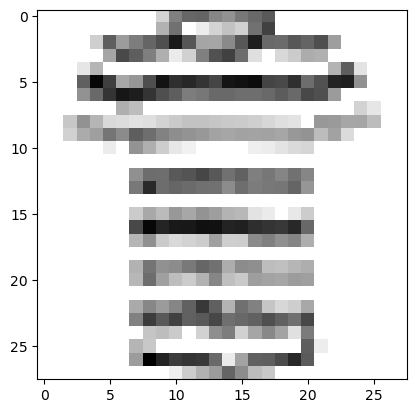

0: This is a t-shirt/top
There are 2033 t-shirts/tops. There are 1947 pairs of trousers. There are 2001 pullovers. There are 2005 dresses. There are 2014 shirts.


In [250]:
show_image(55)

count_categories(train_element)

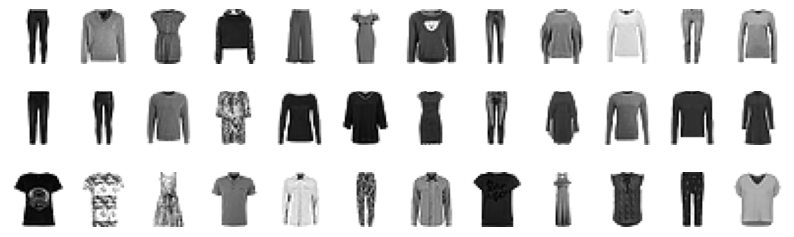

In [229]:
fig, axarr = plt.subplots( 3, 12, figsize=(10, 3))
ax = plt.Axes(fig, [0, 0, 1, 1.])
for y, a in enumerate(axarr[1]):
    axarr[0,y].set_axis_off()
    axarr[1,y].set_axis_off()
    axarr[2,y].set_axis_off()
    axarr[0,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[1,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[2,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')